<hr>
# PYTHON FOR DATA SCIENCE
### Exploring a Real World Example

#Agenda

- <p style="color: red">Define the problem and the approach</p>
- Data basics: loading data, looking at your data, basic commands
- Handling missing values
- Intro to scikit-learn
- Grouping and aggregating data
- Feature selection
- Fitting and evaluating a model
- Deploying your work


##In this notebook you will

- Determine if the problem is worth solving
- Define an approach
- Develop a workflow outline

<hr>
## Revisiting Kaggle's Give Me Some Credit Competition

### Intro

#### We'll be exploring an age-old prediction problem--predicting risk on consumer loans.

#### We've selected this topic as a case study because the problem is well-defined and familiar to most people. Additionally, this is a binary classification problem, so the strategies we apply should be relatively extensible to other problems you may encounter totally unrelated to credit and finance.

### About the data

The data is made available to us by Kaggle and was used in a competition in 2011.

[http://www.kaggle.com/c/GiveMeSomeCredit](http://www.kaggle.com/c/GiveMeSomeCredit)

### About the prediction problem

Predict the probability that somebody will experience financial distress in the next two years.

## Developing an understanding of the data and the problem

#### Key questions we'll need to keep in mind

- How do losses occur?
- What are the characteristics that constitute credit default?
- How often do people "go bad?"
- How might we improve loss rates?

In [2]:
import pandas as pd
df = pd.read_csv("./data/credit-training.csv")


# 
# Column Types?
print df.dtypes

# Missing Value?
# find columns that have null values
print df.isnull().any(axis=0)
# looks like MonthlyIncome has a lot of missing value
print df.shape
print "# null values in MonthlyIncome: %i" % df['MonthlyIncome'].isnull().sum()
print "# null values in NumberOfDependents: %i" % sum(df['NumberOfDependents'].isnull() == True)
df[df.isnull().any(axis=1)]

# Summary?
df.describe()
df.info() # info() is a faster way to spot null values


SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    Fals

In [3]:
# inspect unique and unique counts
print df['NumberOfDependents'].nunique()
print df['NumberOfDependents'].unique()

for col in df.columns:
    print "column %s" % col
    print df[col].value_counts(sort=True).head(5)

13
[  2.   1.   0.  nan   3.   4.   5.   6.   8.   7.  20.  10.   9.  13.]
column SeriousDlqin2yrs
0    139974
1     10026
dtype: int64
column RevolvingUtilizationOfUnsecuredLines
0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.954092        6
dtype: int64
column age
49    3837
48    3806
50    3753
63    3719
47    3719
dtype: int64
column NumberOfTime30-59DaysPastDueNotWorse
0    126018
1     16033
2      4598
3      1754
4       747
dtype: int64
column DebtRatio
0    4113
1     229
4     174
2     170
3     162
dtype: int64
column MonthlyIncome
5000    2757
4000    2106
6000    1934
3000    1758
0       1634
dtype: int64
column NumberOfOpenCreditLinesAndLoans
6    13614
7    13245
5    12931
8    12562
4    11609
dtype: int64
column NumberOfTimes90DaysLate
0    141662
1      5243
2      1555
3       667
4       291
dtype: int64
column NumberRealEstateLoansOrLines
0    56188
1    52338
2    31522
3     6300
4     2170
dtype: int64
column NumberOfTime60-89Day

In [3]:
# crosstab is powerful
print df['SeriousDlqin2yrs'].value_counts()
print pd.crosstab(df['NumberOfDependents'],df['SeriousDlqin2yrs'])

0    139974
1     10026
dtype: int64
SeriousDlqin2yrs        0     1
NumberOfDependents             
0                   81807  5095
1                   24381  1935
2                   17938  1584
3                    8646   837
4                    2565   297
5                     678    68
6                     134    24
7                      46     5
8                      22     2
9                       5     0
10                      5     0
13                      1     0
20                      1     0


In [4]:
# Basic cleaning
import re
def camel_to_snake(column_name):
    """
    converts a string that is camelCase into snake_case
    Example:
        print camel_to_snake("javaLovesCamelCase")
        > java_loves_camel_case
    See Also:
        http://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-camel-case
    """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df.columns = [camel_to_snake(col) for col in df.columns]
df.columns.tolist()

['serious_dlqin2yrs',
 'revolving_utilization_of_unsecured_lines',
 'age',
 'number_of_time30-59_days_past_due_not_worse',
 'debt_ratio',
 'monthly_income',
 'number_of_open_credit_lines_and_loans',
 'number_of_times90_days_late',
 'number_real_estate_loans_or_lines',
 'number_of_time60-89_days_past_due_not_worse',
 'number_of_dependents']

In [66]:
# Basic filtering
#mask = (df.age >= 35) & (df.serious_dlqin2yrs==0) & (df.number_of_open_credit_lines_and_loans < 10)


In [5]:
# Now we are official onto handling missing value...
#?pd.melt
# another way to count missing data
df_lng = pd.melt(df)
null_vals = df_lng.value.isnull()
print null_vals.sum() 
pd.crosstab(df_lng.variable, null_vals)


33655


value,False,True
variable,,
age,150000,0
debt_ratio,150000,0
monthly_income,120269,29731
number_of_dependents,146076,3924
number_of_open_credit_lines_and_loans,150000,0
number_of_time30-59_days_past_due_not_worse,150000,0
number_of_time60-89_days_past_due_not_worse,150000,0
number_of_times90_days_late,150000,0
number_real_estate_loans_or_lines,150000,0


In [6]:
# a toy example of melt
melted = pd.melt(df, id_vars=["serious_dlqin2yrs"], value_vars=["age", "debt_ratio"])
melted.head()

,serious_dlqin2yrs,variable,value
0,1,age,45
1,0,age,40
2,0,age,38
3,0,age,30
4,0,age,49


In [9]:
# pandas provides different ways to fill missing value
s = pd.Series([1, 2, None, 4])
s.fillna(3)
s.bfill()
s.ffill()
s.fillna(s.mean())

0    1.000000
1    2.000000
2    2.333333
3    4.000000
dtype: float64

In [7]:
# handle number_of_dependents
df.number_of_dependents.value_counts()
# we naively fill the missing value with the mode 
df.number_of_dependents = df.number_of_dependents.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 11 columns):
serious_dlqin2yrs                              150000 non-null int64
revolving_utilization_of_unsecured_lines       150000 non-null float64
age                                            150000 non-null int64
number_of_time30-59_days_past_due_not_worse    150000 non-null int64
debt_ratio                                     150000 non-null float64
monthly_income                                 120269 non-null float64
number_of_open_credit_lines_and_loans          150000 non-null int64
number_of_times90_days_late                    150000 non-null int64
number_real_estate_loans_or_lines              150000 non-null int64
number_of_time60-89_days_past_due_not_worse    150000 non-null int64
number_of_dependents                           150000 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [8]:
# we need to take care of monthly_income more sophisticatedly..

# the naive method is to simply fill with median or mean
df.monthly_income.describe()

import numpy as np
# use imputation: we try to infer the value from other columns
# split data into train and test
np.random.seed(713)
is_test = np.random.uniform(0, 1, len(df)) > 0.75
train = df[is_test==False]
test = df[is_test==True]
print len(train), len(test)
# remember to apply the imputer to the test data

112757 37243


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

rows_train = train.monthly_income.notnull()
rows_test = test.monthly_income.notnull()

# get the correlation pairs
train[rows_train].corr().ix[:, 5]


# find the most correlated variables
cols_x = ['number_of_open_credit_lines_and_loans', 'number_of_dependents', 'number_real_estate_loans_or_lines']

train_not_null = train[cols_x][rows_train]
test_not_null = test[cols_x][rows_test]


lr = LinearRegression()
lr.fit(train_not_null, train['monthly_income'][rows_train])
print lr.score(test_not_null, test['monthly_income'][rows_test])
# score: 0.0478125755667
knn = KNeighborsRegressor(n_neighbors=120)
knn.fit(train_not_null, train['monthly_income'][rows_train])
print knn.score(test_not_null, test['monthly_income'][rows_test])
# score: 0.00680687486842

# use linear regression model as imputer

0.051065543525
0.0459214577968


In [10]:
train[rows_train].corr().ix[:, 5]

serious_dlqin2yrs                             -0.017018
revolving_utilization_of_unsecured_lines       0.006672
age                                            0.034647
number_of_time30-59_days_past_due_not_worse   -0.009067
debt_ratio                                    -0.027503
monthly_income                                 1.000000
number_of_open_credit_lines_and_loans          0.083483
number_of_times90_days_late                   -0.011397
number_real_estate_loans_or_lines              0.115077
number_of_time60-89_days_past_due_not_worse   -0.010005
number_of_dependents                           0.056130
Name: monthly_income, dtype: float64

In [11]:
train_null = train[cols_x][~rows_train]
test_null = test[cols_x][~rows_test]

new_values_train = lr.predict(train_null)
train.loc[~rows_train, 'monthly_income'] = new_values_train

new_values_test = lr.predict(test_null)
test.loc[~rows_test, 'monthly_income'] = new_values_test

# ways to deal with the (false positive) warning
#train.loc[~rows_train, 'monthly_income']


C:\Users\Hong Xu\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
#train.describe()
#test.describe()
#df.describe()
#train.to_csv("./data/credit-data-trainingset-hx.csv", index=False)
#test.to_csv("./data/credit-data-testset-hx.csv", index=False)
test.info()
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37243 entries, 0 to 149997
Data columns (total 11 columns):
serious_dlqin2yrs                              37243 non-null int64
revolving_utilization_of_unsecured_lines       37243 non-null float64
age                                            37243 non-null int64
number_of_time30-59_days_past_due_not_worse    37243 non-null int64
debt_ratio                                     37243 non-null float64
monthly_income                                 37243 non-null float64
number_of_open_credit_lines_and_loans          37243 non-null int64
number_of_times90_days_late                    37243 non-null int64
number_real_estate_loans_or_lines              37243 non-null int64
number_of_time60-89_days_past_due_not_worse    37243 non-null int64
number_of_dependents                           37243 non-null float64
dtypes: float64(4), int64(7)
memory usage: 3.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112757 entries, 2 to 149999
Data c

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# now that we have taken care of missing value. let's do more fun stuffs!

train.monthly_income.describe() # many extreme cases
#normalized_monthly_income = train.monthly_income.apply(lambda x: np.log(x + 1))
#normalized_monthly_income.hist()
train['log_monthly_income'] = train.monthly_income.apply(lambda x: np.log(x + 1))
test['log_monthly_income'] = test.monthly_income.apply(lambda x: np.log(x + 1))


C:\Users\Hong Xu\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hong Xu\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
train.debt_ratio.describe() 
# we should cap the debt_ratio at 1
def cap(x, cap):
    return x if x <= cap else cap
#capped_debt_ratio = train.debt_ratio.apply(lambda x: cap(x, 5))
train['capped_debt_ratio'] = train.debt_ratio.apply(lambda x: cap(x, 5))
test['capped_debt_ratio'] = test.debt_ratio.apply(lambda x: cap(x, 5))

C:\Users\Hong Xu\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hong Xu\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [135]:
# split -> apply -> combine
group_by_s_d = train[['serious_dlqin2yrs', 'age', 'monthly_income']].groupby('serious_dlqin2yrs')

for name, group in group_by_s_d:
    print "groupby: ", name
    print group.mean()
    print '*'*50
    
print group_by_s_d.mean()
group_by_s_d.agg([np.mean, np.max, np.min, np.median])


groupby:  0
serious_dlqin2yrs       0.000000
age                    52.712127
monthly_income       6601.077668
dtype: float64
**************************************************
groupby:  1
serious_dlqin2yrs       1.000000
age                    45.992385
monthly_income       5701.173974
dtype: float64
**************************************************
                         age  monthly_income
serious_dlqin2yrs                           
0                  52.712127     6601.077668
1                  45.992385     5701.173974


age                  monthly_income                \
                        mean amax amin median           mean     amax amin   
serious_dlqin2yrs                                                            
0                  52.712127  109    0     52    6601.077668  3008750    0   
1                  45.992385  101   21     46    5701.173974   250000    0   

                                
                        median  
serious_dlqin2yrs               
0                  5500.000000  
1                  4617.162741

In [169]:
# Use groupby to calculate the percent of customers that went bad for each age
group_by_age = train[['serious_dlqin2yrs', 'age']].groupby('age')
bad_count_by_age = group_by_age.sum()
total_by_age = group_by_age.count()
result = total_by_age.join(bad_count_by_age, rsuffix='_bad')
#result['bad_ratio'] = result[[1]]/result[[0]].values
#result.head()


### a much simpler way..
result['pct_dlqin2yrs'] = group_by_age.mean()
result.head()


,serious_dlqin2yrs,serious_dlqin2yrs_bad,pct_dlqin2yrs
age,,,
0,1,0,0.000000
21,138,10,0.072464
22,331,30,0.090634
23,478,56,0.117155
24,603,74,0.122720


In [146]:
pop = pd.read_csv("./data/uspop.csv")

train_join_pop = train[['serious_dlqin2yrs', 'age', 'monthly_income']].merge(pop, on='age', how='left')
train_join_pop.tail()

,serious_dlqin2yrs,age,monthly_income,est_pop
116496,0,50,3400,21866.591837
116497,0,74,2100,8960.836735
116498,0,44,5584,20758.183673
116499,0,30,5716,20163.346939
116500,0,64,8158,16725.387755


In [149]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [168]:
query = '''
    select serious_dlqin2yrs, sum(1) as total
    from train
    group by serious_dlqin2yrs;
    '''
#pysqldf(query)


query_age = '''
    select age, avg(serious_dlqin2yrs) as pct_dlqin2yrs
    from train
    group by age;
    '''
pysqldf(query_age).head()

,age,pct_dlqin2yrs
0,0,0.000000
1,21,0.072464
2,22,0.090634
3,23,0.117155
4,24,0.122720


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features = "sqrt", bootstrap = True, oob_score = True, 
                            random_state = np.random.RandomState(713))
features = np.array(['age',
            'revolving_utilization_of_unsecured_lines',
            'number_of_time30-59_days_past_due_not_worse',
            'capped_debt_ratio',
            'log_monthly_income',
            'number_of_open_credit_lines_and_loans',
            'number_of_times90_days_late',
            'number_real_estate_loans_or_lines',
            'number_of_time60-89_days_past_due_not_worse',
            'number_of_dependents'])

rf.fit(train[features], train['serious_dlqin2yrs'])


C:\Users\Hong Xu\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:373: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1, oob_score=True,
            random_state=<mtrand.RandomState object at 0x000000000DB4B048>,
            verbose=0)

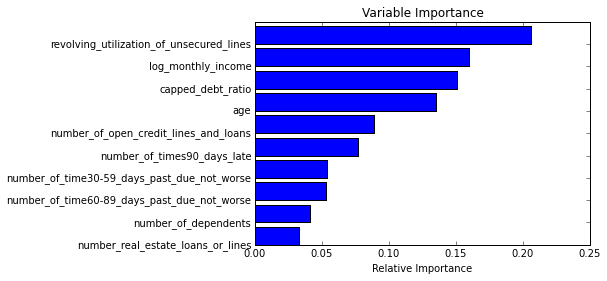

In [16]:
importances = rf.feature_importances_
#zip(features, importances)
s_index = np.argsort(importances) # np.argsort returns index instead of sorted array like np.sort

y_pos = np.arange(len(importances))
plt.barh(y_pos, importances[s_index])
plt.yticks(y_pos, features[s_index])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")


In [24]:
#rf.score(test[features], test['serious_dlqin2yrs'])
rf.oob_score_
rf.predict(train[features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

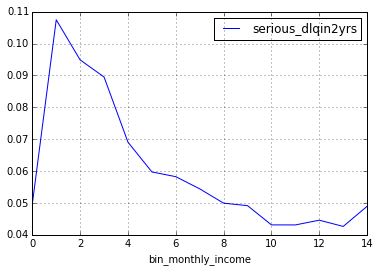

In [221]:
# Various ways of feature engineering

### Bucketize monthly_income
# Result: not helpful


#pd.cut(train.monthly_income, bins=15, labels=False)
#train['bin_monthly_income'] = pd.cut(train.monthly_income.apply(lambda x: cap(x, 15000)), bins=15, labels=False)

train[['bin_monthly_income', 'serious_dlqin2yrs']].groupby('bin_monthly_income').mean().plot()

C:\Users\Hong Xu\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


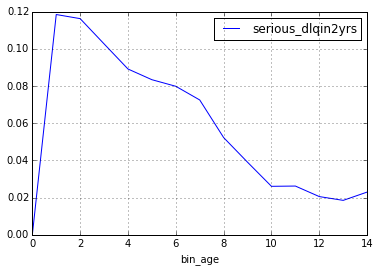

In [287]:
#train[['age', 'serious_dlqin2yrs']].groupby('age').mean().plot()
#train.age.describe()

### Bucketize age
# Result: not helpful

mybins = [-1] + range(20, 90, 5) + [110]
train['bin_age'] = pd.cut(train.age, bins=mybins, labels=False)
# if labels=True
#train.bin_age = pd.factorize(train.bin_age)[0]
#train.bin_age.head()

train[['bin_age', 'serious_dlqin2yrs']].groupby('bin_age').mean().plot()


In [328]:
#########################################################
################ Test Zone ##############################
#########################################################
hasattr(classifiers[1], "decision_function")


False

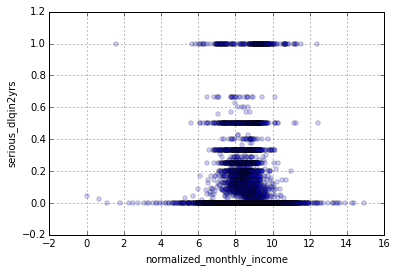

In [242]:
train[['normalized_monthly_income', 'serious_dlqin2yrs']].groupby('normalized_monthly_income')\
.mean().reset_index().plot(kind='scatter', x='normalized_monthly_income', y='serious_dlqin2yrs', alpha=0.2, color=)

In [64]:

from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix



X, y = train[features], train.serious_dlqin2yrs

names = ["Logistic Regression", 
         #"Nearest Neighbors", 
         #"Linear SVM", 
         "Random Forest", 
         "AdaBoost", 
         "Gradient Boosting", 
         "Naive Bayes", 
         "LDA", 
         "QDA"]
classifiers = [
    LogisticRegression(),
    #KNeighborsClassifier(n_neighbors=50),
    #SVC(kernel='linear'),
    RandomForestClassifier(max_features = "sqrt", bootstrap = True,
                            random_state = 713),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

sclr = StandardScaler().fit(X_train)
X_train = sclr.transform(X_train)
X_test = sclr.transform(X_test)


    
    

In [65]:

import time
for name, clf in zip(names, classifiers):
    print '*'*55
    print name
    print '*'*55
    p1 = time.clock()
    clf.fit(X_train, y_train)
    p2 = time.clock()
    print "Training time : %.3f" % (p2 - p1)

    if hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)
    else:
        y_score = clf.predict_proba(X_test)[:, 1]

    #y_pred = clf.predict(X_test)
    # predict lable using probability manually to save time 
    y_pred0 = np.array(map(lambda x: 1 if x > 0.5 else 0, y_score))

    #print y_pred[np.not_equal(y_pred, y_pred0)]
    #print y_score[np.not_equal(y_pred, y_pred0)]
    #print np.where(y_pred != y_pred0)

    p3 = time.clock()
    print "Predicting time : %.3f" % (p3 - p2)

    #print clf.classes_
    print "Accuracy score: %.3f" % (accuracy_score(y_test, y_pred0))
    print "AUC score: %.3f" % (roc_auc_score(y_test, y_score))
    print classification_report(y_test, y_pred0)



    
    
    

*******************************************************
Logistic Regression
*******************************************************
Training time : 0.374
Predicting time : 0.013
Accuracy score: 0.934
AUC score: 0.699
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     34717
          1       0.59      0.03      0.06      2493

avg / total       0.91      0.93      0.90     37210

*******************************************************
Random Forest
*******************************************************
Training time : 1.440
Predicting time : 0.091
Accuracy score: 0.934
AUC score: 0.780
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     34717
          1       0.52      0.17      0.26      2493

avg / total       0.91      0.93      0.92     37210

*******************************************************
AdaBoost
*******************************************************
Training time : 2.995

In [67]:
the_clf = classifiers[-1]
the_clf.fit(X, y)
y_pred = the_clf.predict(test[features])
print classification_report(test.serious_dlqin2yrs, y_pred)

             precision    recall  f1-score   support

          0       0.95      0.97      0.96     34702
          1       0.44      0.31      0.36      2541

avg / total       0.92      0.93      0.92     37243



In [46]:
np.array(map(lambda x: 1 if x >=0.5 else 0, y_score))


0.0032518140284869658

##Building a Model
Since we have a fairly large volume of data (150K), we're going to build a predictive model that will enable us to automatically score each applicant. We will provide each applicant with a credit score. This will give us an easy to interpret, human readable form of the model.

##Our Strategy
If we're building a model, we're going to need a way to know whether or not it's working. Convincing other is oftentimes the most challenging parts of an analysis. Making repeatable, well documented work with clear success metrics makes all the difference.

For our classifier, we're going to use the following build methodology:

In [6]:
from IPython.core.display import Image
Image(url="https://s3.amazonaws.com/demo-datasets/traintest.png")

##Other Things to consider

- [Precision and Recall](http://en.wikipedia.org/wiki/Precision_and_recall) - What good is our classifier if declines everyone?
- [Overfitting](http://en.wikipedia.org/wiki/Overfitting) - Is your model describing noise or signal?
- [Algorithms](http://en.wikipedia.org/wiki/Statistical_classification#Algorithms) - What type of classifiers might work in this scenario?

##We just did the following

- Determined we had a problem in which there was ample room for improvement
- Decided we could use a predictive model to decrease losses
- Proposed a high level workflow